In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
home_sales=pd.read_csv('../data/RDC_Inventory_Core_Metrics_State_History.csv',nrows=4131)

In [3]:
pd.set_option('display.max_rows',100)

In [4]:
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202403,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,845509,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0
1,202403,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,993315,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0
2,202403,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,1507244,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0
3,202403,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,588655,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0
4,202403,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,1574357,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,201707,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,242379,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0
4127,201707,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,831557,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0
4128,201707,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,480837,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0
4129,201707,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,370018,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0


In [5]:
home_sales['month_date_yyyymm']=pd.to_datetime(home_sales['month_date_yyyymm'],format='%Y%m')

In [6]:
home_sales_mean=round(home_sales['median_listing_price'].groupby([home_sales['state_id'],home_sales['month_date_yyyymm']]).mean(),2).to_frame().reset_index()

In [7]:
home_sales_mean

,state_id,month_date_yyyymm,median_listing_price
0,AK,2017-07-01,279375.0
1,AK,2017-08-01,279000.0
2,AK,2017-09-01,275000.0
3,AK,2017-10-01,274900.0
4,AK,2017-11-01,269900.0
...,...,...,...
4126,WY,2023-11-01,442450.0
4127,WY,2023-12-01,435000.0
4128,WY,2024-01-01,434900.0
4129,WY,2024-02-01,449450.0


In [8]:
home_sales['year']=home_sales['month_date_yyyymm'].dt.year

In [9]:
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year
0,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0,2024
1,2024-03-01,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0,2024
2,2024-03-01,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0,2024
3,2024-03-01,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0,2024
4,2024-03-01,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,2017-07-01,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0,2017
4127,2017-07-01,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0,2017
4128,2017-07-01,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0,2017
4129,2017-07-01,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0,2017


In [10]:
home_sales_year=home_sales.groupby(['year', 'state_id'])['median_listing_price'].mean().to_frame().reset_index()

In [11]:
home_sales_year

,year,state_id,median_listing_price
0,2017,AK,274354.166667
1,2017,AL,196538.833333
2,2017,AR,169750.000000
3,2017,AZ,309225.000000
4,2017,CA,529204.166667
...,...,...,...
403,2024,VT,486404.333333
404,2024,WA,620116.666667
405,2024,WI,371525.000000
406,2024,WV,234133.333333


In [12]:
#type_growerlist.loc[type_growerlist['type_name']=='Field Pumpkin'].nlargest(10,'count')
home_sales_year.sort_values(by='median_listing_price',ascending=False).head(10)

,year,state_id,median_listing_price
368,2024,HI,848750.000000
317,2023,HI,848157.083333
266,2022,HI,839354.166667
376,2024,MA,775616.666667
325,2023,MA,759220.416667
310,2023,CA,745371.833333
259,2022,CA,732691.416667
361,2024,CA,731092.333333
215,2021,HI,724316.666667
208,2021,CA,722504.000000


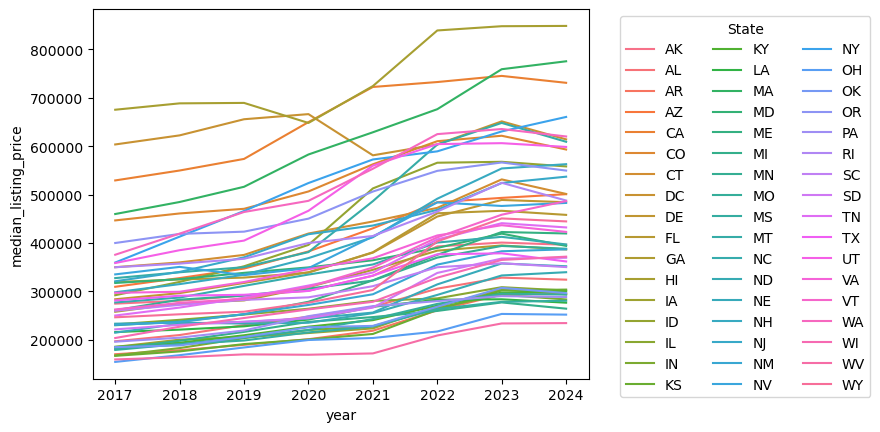

In [13]:
sns.lineplot(x=home_sales_year['year'],y=home_sales_year['median_listing_price'],hue=home_sales_year['state_id'])
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3);

In [14]:
home_sales_year.groupby('state_id')['median_listing_price'].mean()


state_id
AK    333568.531250
AL    263571.812500
AR    225527.562500
AZ    409234.895833
CA    654263.937500
CO    533986.979167
CT    431654.604167
DC    624797.583333
DE    380421.291667
FL    384542.000000
GA    328911.687500
HI    745276.531250
IA    236688.364583
ID    445370.239583
IL    270386.635417
IN    230205.541667
KS    226425.864583
KY    240231.354167
LA    251879.833333
MA    610417.833333
MD    362027.041667
ME    317200.614583
MI    234781.197917
MN    326646.947917
MO    237185.375000
MS    229229.364583
MT    468011.937500
NC    346857.218750
ND    269392.479167
NE    275792.239583
NH    416882.281250
NJ    426718.802083
NM    301153.562500
NV    402799.697917
NY    526874.208333
OH    203655.520833
OK    237861.541667
OR    482851.500000
PA    249227.645833
RI    420579.385417
SC    308618.625000
SD    284226.697917
TN    341612.135417
TX    326724.947917
UT    497908.250000
VA    362917.281250
VT    354580.229167
WA    522443.333333
WI    284944.031250
WV    18849

In [15]:
home_sales.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

In [16]:
home_df=home_sales[['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'active_listing_count', 'median_days_on_market',
           'new_listing_count', 
       'price_increased_count', 
       'price_reduced_count',
       'pending_listing_count', 
       'median_listing_price_per_square_foot',
       'median_square_feet',
       'average_listing_price', 
       'total_listing_count',
       'pending_ratio',
      'quality_flag', 'year']]

In [17]:
csv_file_path= 'home_sales.csv'

In [18]:
df.to_csv(csv_file_path, index=False)


NameError: name 'df' is not defined

In [ ]:
home_df.to_csv(csv_file_path)

In [ ]:
round(home_sales[['price_increased_count','price_reduced_count']].groupby([home_sales['state'],home_sales['year']]).mean()).reset_index()

In [21]:
pd.read_csv('../data/RDC_Inventory_Hotness_Metrics_Metro_History.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/RDC_Inventory_Hotness_Metrics_Metro_History.csv'

In [19]:
hotness


NameError: name 'hotness' is not defined